<a href="https://colab.research.google.com/github/SLiv75/Shelley-Livingston/blob/main/TestLondon03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sound classification with YAMNet

YAMNet is a deep net that predicts 521 audio event [classes](https://github.com/tensorflow/models/blob/master/research/audioset/yamnet/yamnet_class_map.csv) from the [AudioSet-YouTube corpus](http://g.co/audioset) it was trained on. It employs the
[Mobilenet_v1](https://arxiv.org/pdf/1704.04861.pdf) depthwise-separable
convolution architecture.

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import csv
import matplotlib.pyplot as plt
from IPython.display import Audio
from scipy.io import wavfile
import scipy.signal as signal
!pip install pydub
from pydub import AudioSegment
import glob
!pip install pysoundfile
import soundfile

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load the Model from TensorFlow Hub.

Note: to read the documentation just follow the model's [url](https://tfhub.dev/google/yamnet/1)

In [ ]:
# Load the model.
model = hub.load('https://tfhub.dev/google/yamnet/1')

The labels file will be loaded from the models assets and is present at `model.class_map_path()`.
You will load it on the `class_names` variable.

In [ ]:
# Find the name of the class with the top score when mean-aggregated across frames.Labels for categories.
def class_names_from_csv(class_map_csv_text):
  """Returns list of class names corresponding to score vector."""
  class_names = []
  with tf.io.gfile.GFile(class_map_csv_text) as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
      class_names.append(row['display_name'])

  return class_names

class_map_path = model.class_map_path().numpy()
class_names = class_names_from_csv(class_map_path)

Add a method to verify and convert a loaded audio is on the proper sample_rate (16K), otherwise it would affect the model's results.

In [ ]:
#converted to 16 bit
def ensure_sample_rate(original_sample_rate, waveform,
                       desired_sample_rate=16000):
  """Resample waveform if required."""
  if original_sample_rate != desired_sample_rate:
    desired_length = int(round(float(len(waveform)) /
                               original_sample_rate * desired_sample_rate))
    waveform = signal.resample(waveform, desired_length)
  return desired_sample_rate, waveform

In [ ]:
#loading all .wav files from root folder.
LondonFiles01=glob.glob ('/content/drive/MyDrive/AIA - Studio - Team 10/Audio Files/London unzipped/LondonSoundSurveyConvertedtoWav/*.wav')
print (LondonFiles01)

['/content/drive/MyDrive/AIA - Studio - Team 10/Audio Files/London unzipped/LondonSoundSurveyConvertedtoWav/Pymmes-Brook-Oak-Hill-Park.wav', '/content/drive/MyDrive/AIA - Studio - Team 10/Audio Files/London unzipped/LondonSoundSurveyConvertedtoWav/Pymmes-Brook-Tanners-End.wav', '/content/drive/MyDrive/AIA - Studio - Team 10/Audio Files/London unzipped/LondonSoundSurveyConvertedtoWav/Seven-Sisters-indoor-market.wav', '/content/drive/MyDrive/AIA - Studio - Team 10/Audio Files/London unzipped/LondonSoundSurveyConvertedtoWav/River-Lea-Lee-Valley-Park.wav', '/content/drive/MyDrive/AIA - Studio - Team 10/Audio Files/London unzipped/LondonSoundSurveyConvertedtoWav/Silk-Stream-Burnt-Oak-Fields.wav', '/content/drive/MyDrive/AIA - Studio - Team 10/Audio Files/London unzipped/LondonSoundSurveyConvertedtoWav/River-Pinn.wav', '/content/drive/MyDrive/AIA - Studio - Team 10/Audio Files/London unzipped/LondonSoundSurveyConvertedtoWav/River-Lea-Enfield-Lock.wav', '/content/drive/MyDrive/AIA - Studio - 

In [ ]:
#looped through file list to figure out how to split it up.
for file in LondonFiles01: 
  name = file.split ('/')[-1]
  root = '/'.join (file.split ('/')[0:-1])
  print (name, root)

Pymmes-Brook-Oak-Hill-Park.wav /content/drive/MyDrive/AIA - Studio - Team 10/Audio Files/London unzipped/LondonSoundSurveyConvertedtoWav
Pymmes-Brook-Tanners-End.wav /content/drive/MyDrive/AIA - Studio - Team 10/Audio Files/London unzipped/LondonSoundSurveyConvertedtoWav
Seven-Sisters-indoor-market.wav /content/drive/MyDrive/AIA - Studio - Team 10/Audio Files/London unzipped/LondonSoundSurveyConvertedtoWav
River-Lea-Lee-Valley-Park.wav /content/drive/MyDrive/AIA - Studio - Team 10/Audio Files/London unzipped/LondonSoundSurveyConvertedtoWav
Silk-Stream-Burnt-Oak-Fields.wav /content/drive/MyDrive/AIA - Studio - Team 10/Audio Files/London unzipped/LondonSoundSurveyConvertedtoWav
River-Pinn.wav /content/drive/MyDrive/AIA - Studio - Team 10/Audio Files/London unzipped/LondonSoundSurveyConvertedtoWav
River-Lea-Enfield-Lock.wav /content/drive/MyDrive/AIA - Studio - Team 10/Audio Files/London unzipped/LondonSoundSurveyConvertedtoWav
River-Roding-Redbridge.wav /content/drive/MyDrive/AIA - Studi

In [ ]:
#function to make sure files are in correct format (16) and use the model
def prepare_classify (file):
  #get the file name and root directory 
  name = file.split ('/')[-1]
  root = '/'.join (file.split ('/')[0:-1])
  #print ("get the file name and root directory")
#location of the converted files
  new = root + '/LondonConverted02/'
  #print ("location of the converted files")
#converted to 16 bit
  data, samplerate = soundfile.read (file) 
  #print (samplerate)
  #print ("Successfully read the file")
  file_16 = new + name [:-4]+'_16.wav'
  soundfile.write (file_16, data, samplerate, subtype = 'PCM_16')
  #file_16 = file
  #print ("converted to 16 bit")
  #convert to mono file
  stereo_wav_file = AudioSegment.from_wav (file_16)
  stereo_wav_file = stereo_wav_file.set_channels(1)
  file_16_mono = file_16[:-4]+'_mono.wav'
  stereo_wav_file.export(file_16_mono, format="wav")
  #print ("convert to mono file")
  #getting sample rate and data from sound file
  sample_rate, wav_data = wavfile.read (file_16_mono)
  sample_rate, wav_data = ensure_sample_rate(sample_rate, wav_data)

  #normalization - data needs to be from -1 to 1
  waveform = wav_data / tf.int16.max

  #invoking the model
  scores, embeddings, spectrogram = model(waveform)
  scores_np = scores.numpy()
  spectrogram_np = spectrogram.numpy()
  infered_class = class_names[scores_np.mean(axis=0).argmax()]

  return waveform, spectrogram_np, scores, infered_class

In [ ]:

keynamedictionary = {}
for file in LondonFiles01:
  keynamedictionary [file] = prepare_classify (file)
 

get the file name and root directory
location of the converted files
get the file name and root directory
location of the converted files
get the file name and root directory
location of the converted files
get the file name and root directory
location of the converted files
get the file name and root directory
location of the converted files
get the file name and root directory
location of the converted files
get the file name and root directory
location of the converted files
get the file name and root directory
location of the converted files
get the file name and root directory
location of the converted files
get the file name and root directory
location of the converted files
get the file name and root directory
location of the converted files
get the file name and root directory
location of the converted files
get the file name and root directory
location of the converted files
get the file name and root directory
location of the converted files
get the file name and root directo

In [ ]:
for key, result in keynamedictionary.items():
  print (key, result)

Streaming output truncated to the last 5000 lines.
        1.2856694e-08, 1.2646496e-14],
       [8.3366881e-12, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [3.3934006e-07, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)>, 'Silence')
/content/drive/MyDrive/AIA - Studio - Team 10/Audio Files/London unzipped/LondonSoundSurveyConvertedtoWav/Enfield-traffic-1987_mono.wav (array([ 1.31350806e-05, -1.31357421e-05,  1.31364036e-05, ...,
       -1.31330963e-05,  1.31337577e-05, -1.31344191e-05]), array([[-6.9077554, -6.9077554, -6.9077554, ..., -6.9076266, -6.9074883,
        -6.907022 ],
       [-6.9077554, -6.9077554, -6.9077554, ..., -6.9076257, -6.907486 ,
        -6.9070163],
       [-6.9077554, -6.9077554, -6.9077554, ..., -6.9076247, -6.907484 ,
        -6.907011 ],
       ...,
       [-6.9019666, -6.9017353, -6.901478 , ..., -6.725399 , -6.6766653,
        -6.595549 ],
       [-

## Downloading and preparing the sound file

Here you will download a wav file and listen to it.
If you have a file already available, just upload it to colab and use it instead.

Note: The expected audio file should be a mono wav file at 16kHz sample rate.

In [ ]:
# Listening to the wav file.
#Audio(wav_data, rate=sample_rate)

The `wav_data` needs to be normalized to values in `[-1.0, 1.0]` (as stated in the model's [documentation](https://tfhub.dev/google/yamnet/1)).

## Executing the Model

Now the easy part: using the data already prepared, you just call the model and get the: scores, embedding and the spectrogram.

The score is the main result you will use.
The spectrogram you will use to do some visualizations later.

## Visualization

YAMNet also returns some additional information that we can use for visualization.
Let's take a look on the Waveform, spectrogram and the top classes inferred.

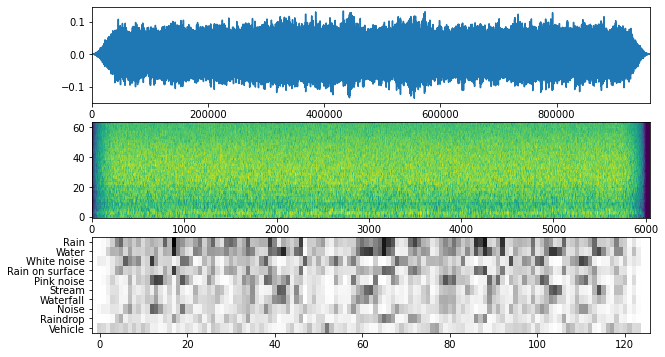

In [ ]:
waveform = keynamedictionary [LondonFiles01[0]][0]
spectrogram_np = keynamedictionary [LondonFiles01[0]][1]
scores = keynamedictionary [LondonFiles01[0]][2]
scores_np = scores.numpy()
plt.figure(figsize=(10, 6))

# Plot the waveform.
plt.subplot(3, 1, 1)
plt.plot(waveform)
plt.xlim([0, len(waveform)])

# Plot the log-mel spectrogram (returned by the model).
plt.subplot(3, 1, 2)
plt.imshow(spectrogram_np.T, aspect='auto', interpolation='nearest', origin='lower')

# Plot and label the model output scores for the top-scoring classes.
mean_scores = np.mean(scores, axis=0)
top_n = 10
top_class_indices = np.argsort(mean_scores)[::-1][:top_n]
plt.subplot(3, 1, 3)
plt.imshow(scores_np[:, top_class_indices].T, aspect='auto', interpolation='nearest', cmap='gray_r')

# patch_padding = (PATCH_WINDOW_SECONDS / 2) / PATCH_HOP_SECONDS
# values from the model documentation
patch_padding = (0.025 / 2) / 0.01
plt.xlim([-patch_padding-0.5, scores.shape[0] + patch_padding-0.5])
# Label the top_N classes.
yticks = range(0, top_n, 1)
plt.yticks(yticks, [class_names[top_class_indices[x]] for x in yticks])
_ = plt.ylim(-0.5 + np.array([top_n, 0]))

In [ ]:
print (keynamedictionary)

{'/content/drive/MyDrive/AIA - Studio - Team 10/Audio Files/London unzipped/LondonSoundSurveyConvertedtoWav/Pymmes-Brook-Oak-Hill-Park.wav': (array([ 3.76020345e-06, -3.76063707e-06,  3.76107108e-06, ...,
       -3.75890498e-06,  3.75933741e-06, -3.75977023e-06]), array([[-6.9077554, -6.9077554, -6.9077554, ..., -6.907716 , -6.907674 ,
        -6.907534 ],
       [-6.8957896, -6.857044 , -6.840959 , ..., -6.7209764, -6.7784643,
        -6.8355145],
       [-6.8340235, -6.8554525, -6.839029 , ..., -6.509431 , -6.6251516,
        -6.5772448],
       ...,
       [-6.9077554, -6.9077554, -6.9077554, ..., -6.9077554, -6.9077554,
        -6.9077554],
       [-6.9077554, -6.9077554, -6.9077554, ..., -6.9077554, -6.9077554,
        -6.9077554],
       [-6.9077554, -6.9077554, -6.9077554, ..., -6.9077554, -6.9077554,
        -6.9077554]], dtype=float32), <tf.Tensor: shape=(125, 521), dtype=float32, numpy=
array([[2.6564896e-03, 1.4880300e-04, 3.8203597e-04, ..., 8.8989735e-03,
        9.2723966

In [ ]:
categories = list (keynamedictionary.values ())
uniquecategories = set ([categories [i] [3] for i in range (len (categories))])
print (uniquecategories)

{'Water', 'Liquid', 'Rain', 'Speech', 'Crow', 'Wind', 'Bird vocalization, bird call, bird song', 'Boat, Water vehicle', 'Mechanical fan', 'Animal', 'Silence', 'Bird', 'Pour', 'Mechanisms', 'Outside, rural or natural', 'Inside, small room', 'Stream', 'Vehicle', 'Insect'}


In [ ]:
def assign_weight (category):
  if category == "Water":
    val = 1
  if category == "Liquid":
    val = 1
  if category == "Rain":
    val = 1
  if category == "Speech":
    val = .4
  if category == "Crow":
    val = .3
  if category == "Wind":
    val = .6
  if category == "Bird vocalization, bird call, bird song":
    val = 1
  if category == "Boat, Water vehicle":
    val = .3
  if category == "Mechanical fan":
    val = .2
  if category == "Animal":
    val = .7
  if category == "Silence":
    val = .6
  if category == "Bird":
    val = 1
  if category == "Pour":
    val = .5
  if category == "Mechanisims":
    val = .1
  if category == "Outside, rural or natural":
    val = 1
  if category == "Inside, small room":
    val = .5
  if category == "Stream":
    val = 1
  if category == "Vehicle":
    val = .1
  if category == "Insect":
    val = .4
  return val

In [ ]:
result = {}
for key, val in keynamedictionary.items ():
  # print (key)
  # print (val)
  result [key] = assign_weight (val [3])


UnboundLocalError: ignored

In [ ]:
for key, val in result.items ():
  print (key)
  print (val)
  print ()

/content/drive/MyDrive/AIA - Studio - Team 10/Audio Files/London unzipped/LondonSoundSurveyConvertedtoWav/Pymmes-Brook-Oak-Hill-Park.wav
1

/content/drive/MyDrive/AIA - Studio - Team 10/Audio Files/London unzipped/LondonSoundSurveyConvertedtoWav/Pymmes-Brook-Tanners-End.wav
0.1

/content/drive/MyDrive/AIA - Studio - Team 10/Audio Files/London unzipped/LondonSoundSurveyConvertedtoWav/Seven-Sisters-indoor-market.wav
0.4

/content/drive/MyDrive/AIA - Studio - Team 10/Audio Files/London unzipped/LondonSoundSurveyConvertedtoWav/River-Lea-Lee-Valley-Park.wav
0.3

/content/drive/MyDrive/AIA - Studio - Team 10/Audio Files/London unzipped/LondonSoundSurveyConvertedtoWav/Silk-Stream-Burnt-Oak-Fields.wav
0.1

/content/drive/MyDrive/AIA - Studio - Team 10/Audio Files/London unzipped/LondonSoundSurveyConvertedtoWav/River-Pinn.wav
1

/content/drive/MyDrive/AIA - Studio - Team 10/Audio Files/London unzipped/LondonSoundSurveyConvertedtoWav/River-Lea-Enfield-Lock.wav
1

/content/drive/MyDrive/AIA - Stu

In [ ]:
# dictionary of lists  
dict = {'filename': nme, 'pixel': pixel}  
       
df = pd.DataFrame(dict) 
    
# saving the dataframe 
df.to_csv('GFG.csv') 

NameError: ignored